In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

<Axes: >

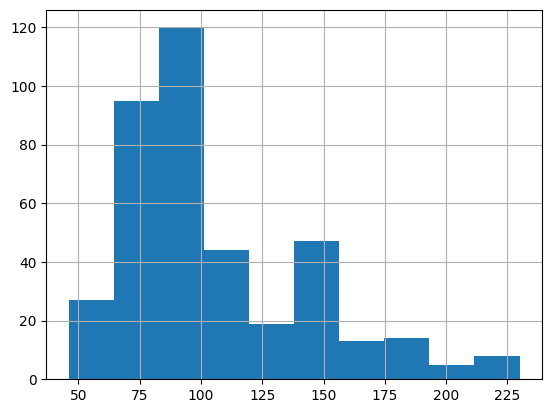

In [ ]:
import matplotlib.pyplot as plt
f,ax = plt.subplot(1,2,figsize = (12,5))
df.horsepower.hist()   # --> scaling 의 의미 : 데이터의 수에 대한 비율은 그대로 

In [6]:
# horsepower 열을 Min-Max Scaling 적용 (판다스)
# 평균 : 0, 표준편차 : 1 로 만드는 게 Standard Scaling
# 각각의 데이터가 그룹 안에서 얼마나 평균적인지를 수치로 나타낸 값
# 장점 : 중앙값을 중심으로 변화되기 때문에 이상치에 덜 민감하다.
# 단점 : 범위가 고정된 데이터에 부적합 (EX: 이미지 0~255)

df['horsepower_minmax'] = (df['horsepower'] - df['horsepower'].min()) / \
                          (df['horsepower'].max() - df['horsepower'].min()) 

df['horsepower_minmax'].head()
df['horsepower'].head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

In [8]:
# horsepower 열을 Min-Max Scaling 적용 (사이킷런)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['horsepower_minmax'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_minmax'].head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_minmax, dtype: float64

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplot(1,2,figsize=(12,5))


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>